# Hotel Booking Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading the data

In [2]:
data = pd.read_csv(r'E:\Projects DB\hotel-booking-demand\hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
len(data.columns)

32

In [5]:
df = data.copy()

## Finding the features with more than 5% NaN

In [6]:
var_with_na = [var for var in df.columns if df[var].isnull().sum()>(0.05*len(df))]
var_with_na

['agent', 'company']

## Since our var_with_na is categorical, dropping the variable is better than filling them with some value

In [7]:
df = df.drop(['agent', 'company'], axis = 1)

In [8]:
len(df.columns)

30

## Hotel Type wise Counts

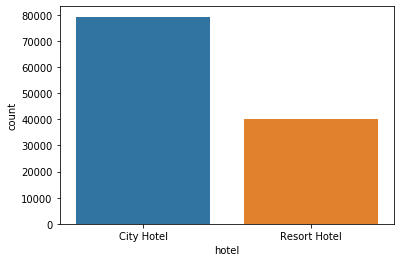

In [9]:
b = df.groupby('hotel')['is_canceled'].count().reset_index()
b.columns = ['hotel', 'count']
sns.barplot(x='hotel', y='count', data = b)

## Hotel type wise cancellation trend

In [10]:
a = df.groupby(['hotel','is_canceled'])['lead_time'].count().reset_index()
a.columns = ['hotel', 'is_canceled', 'count']
a

,hotel,is_canceled,count
0,City Hotel,0,46228
1,City Hotel,1,33102
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


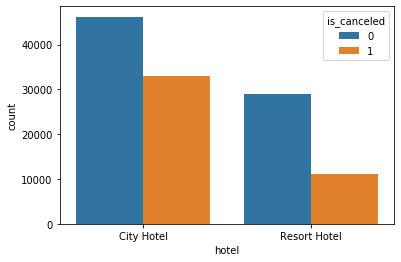

In [11]:
sns.barplot(x='hotel',y='count',hue='is_canceled', data= a)
plt.show()

## Hotel wise lead time

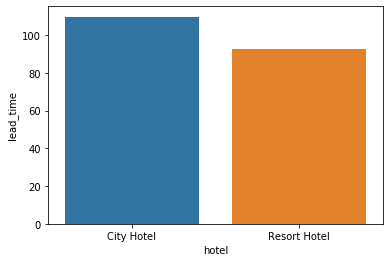

In [12]:
c = df.groupby('hotel')['lead_time'].mean().reset_index()
c.columns = ['hotel', 'lead_time']
sns.barplot(x = 'hotel', y = 'lead_time', data = c)

## Hotel wise booking repeatability

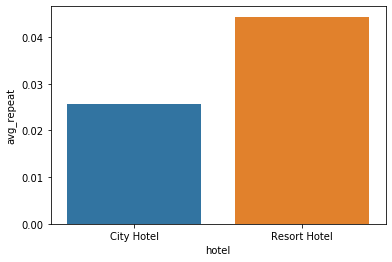

In [13]:
d = df.groupby('hotel')['is_repeated_guest'].mean().reset_index()
d.columns = ['hotel', 'avg_repeat']
sns.barplot(x='hotel',y='avg_repeat', data = d)

## Week wise demand for each hotel type

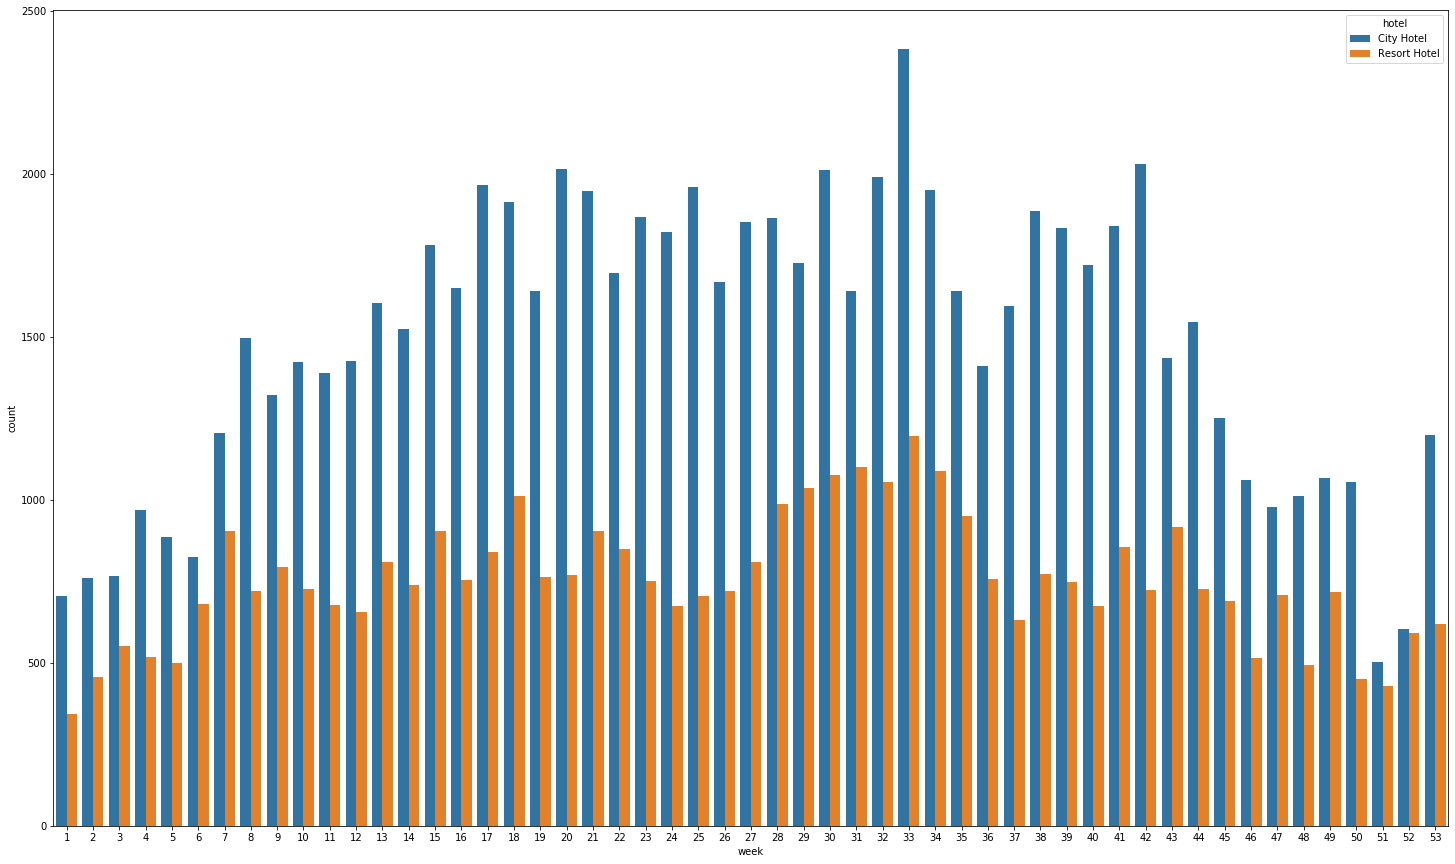

In [14]:
e = df.groupby(['hotel','arrival_date_week_number'])['is_canceled'].count().reset_index()
e.columns = ['hotel', 'week', 'count']
plt.figure(figsize=(25,15))
sns.barplot(x='week', y='count', hue ='hotel', data = e)

## Hotel wise week-end and week-day demand - number of booking per night per hotel 

In [15]:
f = df.groupby('hotel')['stays_in_weekend_nights'].sum().reset_index()
g = df.groupby('hotel')['stays_in_week_nights'].sum().reset_index()
f['stays_in_week_nights'] = g['stays_in_week_nights']
f['hotel_count'] = b['count']
f['weekend_demand'] = f['stays_in_weekend_nights'] / f['hotel_count']
f['weekday_demand'] = f['stays_in_week_nights'] / f['hotel_count']
f

,hotel,stays_in_weekend_nights,stays_in_week_nights,hotel_count,weekend_demand,weekday_demand
0,City Hotel,63082,173174,79330,0.795185,2.182957
1,Resort Hotel,47664,125337,40060,1.189815,3.128732


## Is there a correlation between children and cancellation

In [16]:
df['children'] = df['children'].fillna(0)

In [17]:
tot_cancel = df['is_canceled'].sum()
tot_trip_with_child = 0
hyp_true = 0
hyp_false = 0
for n in range(len(df)):
    if df['children'][n] > 0:
        tot_trip_with_child += 1
        if df['is_canceled'][n] > 0:
            hyp_false += 1
        else:
            hyp_true += 1

prob_cancel_with_child = hyp_false / tot_trip_with_child
prob_cancel_with_child

0.3639115250291036

### Probability of cancellation when travelling with children is 36%

## Let's see which weekday has highest booking in each hotel type

In [18]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

### converting month in string format to number format

In [19]:
mon = {'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6,'July':7, 
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

df['arrival_date_month'] = df['arrival_date_month'].map(mon)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### creating a new column - name of the weekday

In [20]:
week = ['Monday', 'Tuesday', 'Wednessday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp_list = []

for n in range(len(df)):
    temp_list.append(week[calendar.weekday(df['arrival_date_year'][n],df['arrival_date_month'][n],df['arrival_date_day_of_month'][n])])

df['weekday'] = temp_list
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekday
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wednessday
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wednessday
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,Wednessday
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,Wednessday
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,Wednessday


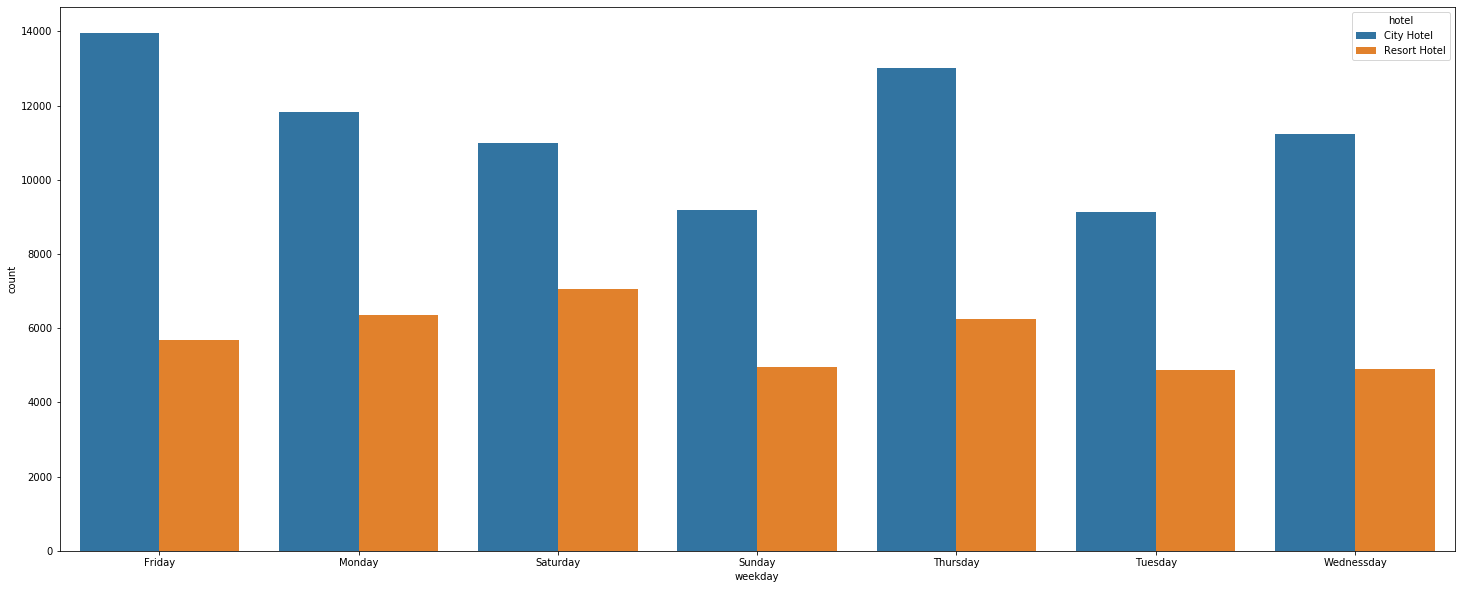

In [21]:
h = df.groupby(['hotel','weekday'])['is_canceled'].count().reset_index()
h.columns = ['hotel', 'weekday', 'count']
plt.figure(figsize=(25,10))
sns.barplot(x='weekday', y='count', hue='hotel', data = h)

### Friday and Thursday has highest number of bookings.

## Is there a correlation between weekday and cancellation

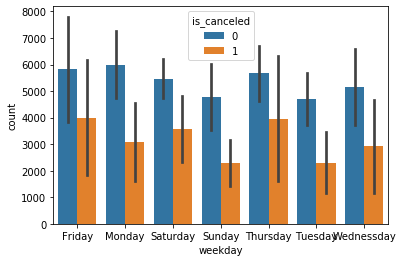

In [22]:
i = df.groupby(['hotel', 'weekday', 'is_canceled'])['lead_time'].count().reset_index()
i.columns = ['hotel', 'weekday', 'is_canceled', 'count']
sns.barplot(x = 'weekday', y='count', hue  = 'is_canceled', data=i)

### The cancellation as percentage with respect to no-cancellation is 68 on Thursday and Friday 

## Is there a correlation between Country and Cancellation

In [23]:
j = df.groupby('country')['is_canceled'].count().reset_index()
j.columns = ['country1','count']
k = df.groupby('country')['is_canceled'].sum().reset_index()
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
country1    177 non-null object
count       177 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [24]:
l = pd.concat([k,j],axis=1)
l = l.drop(['country1'],axis = 1)
l['cancellation_rate'] = l['is_canceled'] *100 / l['count'] 
l

,country,is_canceled,count,cancellation_rate
0,ABW,0,2,0.000000
1,AGO,205,362,56.629834
2,AIA,0,1,0.000000
3,ALB,2,12,16.666667
4,AND,5,7,71.428571
5,ARE,43,51,84.313725
6,ARG,54,214,25.233645
7,ARM,2,8,25.000000
8,ASM,0,1,0.000000
9,ATA,0,2,0.000000


In [25]:
country_can_rate = []
for n in range(len(l)):
    if l['cancellation_rate'][n] >= 75:
        country_can_rate.append(l['country'][n])
country_can_rate

['ARE',
 'BEN',
 'BGD',
 'BHR',
 'FJI',
 'FRO',
 'GGY',
 'GLP',
 'HKG',
 'HND',
 'IMN',
 'JEY',
 'KHM',
 'MAC',
 'MDV',
 'MYT',
 'NIC',
 'TJK',
 'UMI',
 'VGB']

### the guests from the above mentioned countries have more than 75% cancellation rate